In [1]:
import pandas
import cv2
from mpl_toolkits.mplot3d import Axes3D

bottle_data_location = "/iliad2/u/jmeribe/projects/vlm-scaffolding/varying_bottle_params.csv"

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import Video, display
import os

In [2]:
bottle_df = pd.read_csv(bottle_data_location)
bottle_df.head(10)

,friction,density,center_of_mass,scale,max_contact_force,success_rate
0,0.01 0 0,NaN,NaN,NaN,-37405.812 -17036.691 20572.467,0.970
1,0.02 0 0,NaN,NaN,NaN,-6752773. -3707726.8 -849730.94,0.979
2,0.03 0 0,NaN,NaN,NaN,54041.49 6758.46 18487.771,0.974
3,0.04 0 0,NaN,NaN,NaN,358503.1 41886.926 479181.88,0.975
4,0.05 0 0,NaN,NaN,NaN,8991.782 3544.0042 -20952.408,0.976
5,0.1 0 0,NaN,NaN,NaN,14984.025 -2198.5867 -11299.287,0.977
6,0.2 0 0,NaN,NaN,NaN,61353.54 58428.87 -23377.363,0.983
7,0.3 0 0,NaN,NaN,NaN,-2.1497092e+05 2.4414433e-02 2.7314397e+05,0.986
8,0.4 0 0,NaN,NaN,NaN,89062.18 29979.014 -68642.43,0.988
9,0.5 0 0,NaN,NaN,NaN,13092.649 5158.2646 23542.266,0.988


In [3]:
bottle_friction_df = bottle_df[["friction", "success_rate", "max_contact_force"]]
bottle_friction_df = bottle_friction_df[bottle_friction_df["friction"].notna()]

bottle_friction_df.head(5)

,friction,success_rate,max_contact_force
0,0.01 0 0,0.970,-37405.812 -17036.691 20572.467
1,0.02 0 0,0.979,-6752773. -3707726.8 -849730.94
2,0.03 0 0,0.974,54041.49 6758.46 18487.771
3,0.04 0 0,0.975,358503.1 41886.926 479181.88
4,0.05 0 0,0.976,8991.782 3544.0042 -20952.408


In [4]:
bottle_density_df = bottle_df[["density", "success_rate", "max_contact_force"]]
bottle_density_df = bottle_density_df[bottle_density_df["density"].notna()]

bottle_density_df.head(5)

,density,success_rate,max_contact_force
28,250.0,0.208,-2046.3163 -12425.22 -20745.252
29,500.0,0.882,-6055.9375 -52270.023 8919.132
30,750.0,0.991,35100.676 39811.95 -2327.981
31,1000.0,0.993,59038.062 37990.496 -30130.117
32,1250.0,0.993,16315.218 10230.464 -4442.1636


In [5]:
bottle_com_df = bottle_df[["center_of_mass", "success_rate", "max_contact_force"]]
bottle_com_df = bottle_com_df[bottle_com_df["center_of_mass"].notna()]

bottle_com_df.head(5)

,center_of_mass,success_rate,max_contact_force
44,0.0 0.0 0.0,0.988,32098.006 -28739.021 140179.67
45,-0.03 0.03 0.03,0.984,-30058.303 34217.51 12022.58
46,-0.03 -0.03 0.03,0.981,18525.992 -854.27124 -16648.254
47,-0.03 0.03 -0.03,0.988,-20535.188 170470.52 62702.54
48,0.03 -0.03 -0.03,0.992,11237.93 -3487.2104 -4490.481


In [6]:
bottle_scale_df = bottle_df[["scale", "success_rate", "max_contact_force"]]
bottle_scale_df = bottle_scale_df[bottle_scale_df["scale"].notna()]

bottle_scale_df.head(5)

,scale,success_rate,max_contact_force
160,0.50,0.001,-204.07736 1432.212 -455.1699
161,0.75,0.037,-5022.9795 -1847.5505 3963.2937
162,1.00,0.381,63701.53 6005.097 -149650.52
163,1.25,0.988,-2139.2393 156586.72 -35674.62
164,1.50,0.993,59038.062 37990.504 -30130.12


In [7]:
def scatter_plot(title, points, x_label, y_label):
    fig, ax = plt.subplots(figsize=(6, 4))
    x, y = zip(*points)
    ax.scatter(x, y, s=30, edgecolor='black', linewidth=0.5, alpha=0.8)
    ax.set_title(title, fontsize=14, weight='bold', pad=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.tight_layout()
    plt.show()


def scatter_plot_3d(title, points, x_label, y_label, z_label, c_label="Success Rate"):
    fig = plt.figure(figsize=(24,8))
    ax = fig.add_subplot(111, projection='3d')

    x, y, z, c = zip(*points)

    scatter = ax.scatter(x, y, z, c=c, cmap='viridis', s=30, edgecolor='black', linewidth=0.5, alpha=0.8)

    ax.set_title(title, fontsize=14, weight='bold', pad=12)
    ax.set_xlabel(x_label, fontsize=12)
    ax.set_ylabel(y_label, fontsize=12)
    ax.set_zlabel(z_label, fontsize=12)

    fig.colorbar(scatter, ax=ax, label=c_label, shrink=0.6, aspect=12, pad=0.1)
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)

    plt.tight_layout()
    plt.show()

def play_video_jupyter(video_path, width=640, height=480, embed=True):
    if not os.path.exists(video_path):
        print(f"Error: File not found: {video_path}")
        return
    display(Video(video_path, width=width, height=height, embed=embed))

In [8]:
friction_points = map(lambda tup: (float(tup[0].split()[0]), float(tup[1])), bottle_friction_df[["friction", "success_rate"]].itertuples(index=False, name=None))
friction_points = filter(lambda x: x[0] < 1.5 ,friction_points)

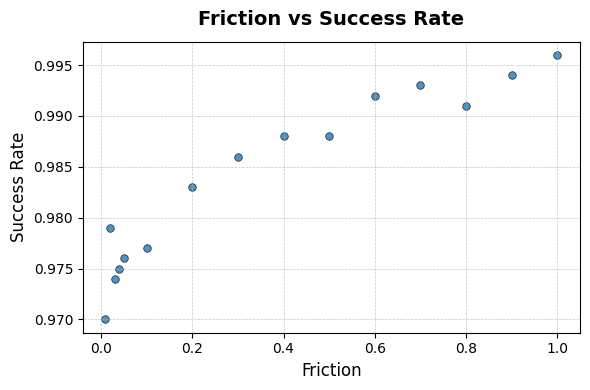

In [9]:
scatter_plot("Friction vs Success Rate", friction_points, "Friction", "Success Rate")

In [10]:
scale_points = map(lambda tup: (float(tup[0]), float(tup[1])), bottle_scale_df[["scale", "success_rate"]].itertuples(index=False, name=None))

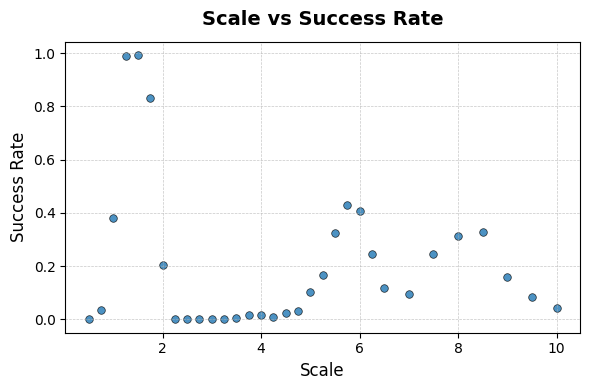

In [11]:
scatter_plot("Scale vs Success Rate", scale_points, "Scale", "Success Rate")

In [12]:
density_points = map(lambda tup: (float(tup[0]), float(tup[1])), bottle_density_df[["density", "success_rate"]].itertuples(index=False, name=None))

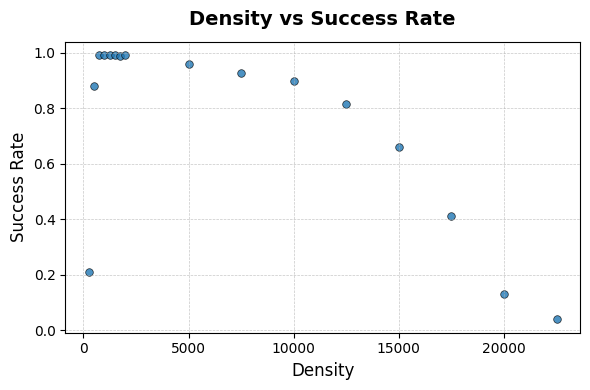

In [13]:
scatter_plot("Density vs Success Rate", density_points, "Density", "Success Rate")

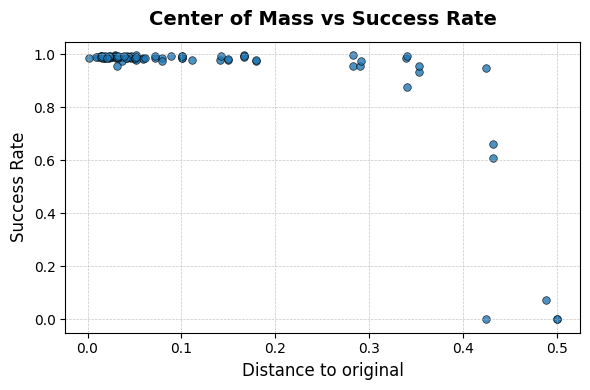

In [15]:
original_com = np.array([-3.70341656e-05,  2.23743938e-04, -1.12127676e-02])
com_points = map(lambda tup: (np.linalg.norm(np.array(list(map(float, tup[0].split()))) - original_com).astype(float), float(tup[1])), bottle_com_df[["center_of_mass", "success_rate"]].itertuples(index=False, name=None))

com_points = filter(lambda tup: tup[0] < 0.5, com_points)
scatter_plot("Center of Mass vs Success Rate", com_points, "Distance to original", "Success Rate")